Рубежный контроль №2
Необходимо подготовить отчет по рубежному контролю и разместить его в Вашем репозитории. Вы можете использовать титульный лист, или в начале ноутбука в текстовой ячейке указать Ваши Ф.И.О. и группу.
Тема: Методы построения моделей машинного обучения.
Задание. 
Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных).

Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). 

Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). 

Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей?

Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.


РТ5-61Б	Дерево решений	Градиентный бустинг

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm, tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from operator import itemgetter


In [2]:
df = pd.read_csv('./hotel_bookings.csv', sep=',')

In [3]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
def count_nan(data):
    for col in data.columns:
        count_nan = data[data[col].isnull()].shape[0]
        print('{} имеет NAN: {}'.format(col, count_nan))
count_nan(df)

hotel имеет NAN: 0
is_canceled имеет NAN: 0
lead_time имеет NAN: 0
arrival_date_year имеет NAN: 0
arrival_date_month имеет NAN: 0
arrival_date_week_number имеет NAN: 0
arrival_date_day_of_month имеет NAN: 0
stays_in_weekend_nights имеет NAN: 0
stays_in_week_nights имеет NAN: 0
adults имеет NAN: 0
children имеет NAN: 4
babies имеет NAN: 0
meal имеет NAN: 0
country имеет NAN: 488
market_segment имеет NAN: 0
distribution_channel имеет NAN: 0
is_repeated_guest имеет NAN: 0
previous_cancellations имеет NAN: 0
previous_bookings_not_canceled имеет NAN: 0
reserved_room_type имеет NAN: 0
assigned_room_type имеет NAN: 0
booking_changes имеет NAN: 0
deposit_type имеет NAN: 0
agent имеет NAN: 16340
company имеет NAN: 112593
days_in_waiting_list имеет NAN: 0
customer_type имеет NAN: 0
adr имеет NAN: 0
required_car_parking_spaces имеет NAN: 0
total_of_special_requests имеет NAN: 0
reservation_status имеет NAN: 0
reservation_status_date имеет NAN: 0


# Заполнение пропусков

### столбцы имеющие пропуска - country, company, agent, children

company - имеет слишком много пропусков поэтому удалим данный столбец

agent - имеет в районе 20% пропусков, что больше 5%, поэтому тоже удаляем

children - имеет 4 пропуска. Выдадим среднее значение

country - удалим

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [7]:
strateg=['mean', 'median', 'most_frequent']

In [8]:
def fill_nan(strategy_param, data):
    imputation = SimpleImputer(strategy=strategy_param)
    data_fill = imputation.fit_transform(data)
    return data_fill

In [9]:
children = fill_nan(strateg[2], df[['children']])

In [10]:
df.children = children

In [11]:
df.drop(['company', 'agent', 'reservation_status', 'reservation_status_date', 
         'deposit_type', 'meal','market_segment', 'distribution_channel', 
         'arrival_date_month', 'customer_type', 'country'], axis= 1 , inplace= True )

In [12]:
# from collections import Counter
# l = list(df.country)
# value = Counter(l).most_common(1)
# print(value[0][0])

In [13]:
# df.fillna(value[0][0], inplace=True)

In [14]:
count_nan(df)

hotel имеет NAN: 0
is_canceled имеет NAN: 0
lead_time имеет NAN: 0
arrival_date_year имеет NAN: 0
arrival_date_week_number имеет NAN: 0
arrival_date_day_of_month имеет NAN: 0
stays_in_weekend_nights имеет NAN: 0
stays_in_week_nights имеет NAN: 0
adults имеет NAN: 0
children имеет NAN: 0
babies имеет NAN: 0
is_repeated_guest имеет NAN: 0
previous_cancellations имеет NAN: 0
previous_bookings_not_canceled имеет NAN: 0
reserved_room_type имеет NAN: 0
assigned_room_type имеет NAN: 0
booking_changes имеет NAN: 0
days_in_waiting_list имеет NAN: 0
adr имеет NAN: 0
required_car_parking_spaces имеет NAN: 0
total_of_special_requests имеет NAN: 0


### hotel имеет всего два значения поэтому преобразуем в 1 и 2 соответственно

In [15]:

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['hotel']= label_encoder.fit_transform(df['hotel'])
df['reserved_room_type']= label_encoder.fit_transform(df['reserved_room_type'])
df['assigned_room_type']= label_encoder.fit_transform(df['assigned_room_type'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_week_number        119390 non-null  int64  
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   stays_in_weekend_nights         119390 non-null  int64  
 7   stays_in_week_nights            119390 non-null  int64  
 8   adults                          119390 non-null  int64  
 9   children                        119390 non-null  float64
 10  babies                          119390 non-null  int64  
 11  is_repeated_guest               119390 non-null  int64  
 12  previous_cancell

## Разделение на тестовую и обучающую выборки
## Масштабировние

In [18]:
y = df['is_canceled']
x = df.drop('is_canceled', axis = 1)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size = 0.2, random_state = 0)


## Дерево решений


In [21]:
dt = DecisionTreeClassifier(random_state=0)
dt_prediction = dt.fit(x_train, y_train).predict(x_test)

## Градиентный бустинг


In [23]:
gb = GradientBoostingClassifier(random_state=0)
gb_prediction = gb.fit(x_train, y_train).predict(x_test)

## Оценка качества решений


In [24]:
print("Decision tree: ", accuracy_score(y_test, dt_prediction))
print("Gradient boosting: ", accuracy_score(y_test, gb_prediction))

Decision tree:  0.8125471144987018
Gradient boosting:  0.7833570650808276


Decision tree


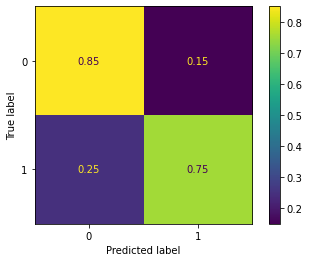

In [26]:
print("Decision tree")

cm = confusion_matrix(y_test, dt_prediction, labels=df.is_canceled.unique(), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df.is_canceled.unique())
disp.plot()

Gradient boosting


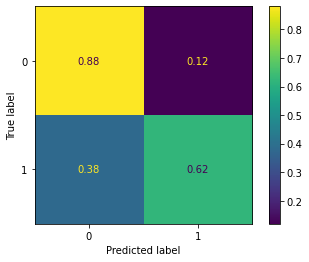

In [29]:
print("Gradient boosting")

cm = confusion_matrix(y_test, gb_prediction, labels=df.is_canceled.unique(), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df.is_canceled.unique())
disp.plot()

Для оценки качества решений я использовал метрики, подходящие для задач классиьфикации: accuracy и confusion matrix.
Обе модели имеют хороший результат, но дерево решений забирает первую позицию